# Lab 4, Part 2 - Using Python to Read and Display .fits Files

### Allison, Ryogo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
# %matplotlib inline

The cell above imports all of the .fits file handling functions from the astropy python library. To call any function from the library, type fits.functionname. To see a list of available functions, click in the cell below, move your cursor to just after the period, and hit tab. You'll see a dropdown list of available functions.

In [2]:
## don't execute this cell. It's incomplete and won't do anything. Make sure you comment it out before submitting!
#fits.

To start, let's read in a .fits file with `fits.open`

In [2]:
data = fits.open('M13-002_R.proc.fit')
data2 = fits.open("cluster_proc.fits")

We've created a python object called `data` above, but `data` is a special type of python object called an HDUlist, which is more or less just a list of python objects. The .fits file format can have many extensions besides just a data array and a header (other data arrays, other text files, etc.). In most cases in astronomy, and in probably all the cases for this class, we are only concerned with the first object in the list, which contains the main data array and header. This first object has index 0. One useful method for an HDUlist is `.info()`, which will tell you about how many objects are in the list. If you execute the cell below, you can see that there's only one, called PRIMARY, and `.info()` also lists its dimensions and the type of numbers stored in the array (64-bit floats)

In [3]:
data.info()

Filename: M13-002_R.proc.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (1536, 1024)   float64   


More useful may be displaying the header in python, just like we did in DS9. The header is associated with the Primary HDU, so you need to index `data` with [0] in order to see it.

In [4]:
data[0].header

SIMPLE  =                    T /image conforms to FITS standard                 
BITPIX  =                  -64 /bits per data value                             
NAXIS   =                    2 /number of axes                                  
NAXIS1  =                 1536 /                                                
NAXIS2  =                 1024 /                                                
EXTEND  =                    T /file may contain extensions                     
DATE-OBS= '2013-05-28T05:42:57' /YYYY-MM-DDThh:mm:ss observation start, UT      
EXPTIME =   180.00000000000000 /Exposure time in seconds                        
EXPOSURE=   180.00000000000000 /Exposure time in seconds                        
SET-TEMP=  -20.000000000000000 /CCD temperature setpoint in C                   
CCD-TEMP=  -20.417621345447465 /CCD temperature at start of exposure in C       
XPIXSZ  =   18.000000000000000 /Pixel Width in microns (after binning)          
YPIXSZ  =   18.0000000000000

To display a .fits image, we can use the function `imshow`, as in the cell below. First we need to make an ordinary 2D array from the image data, which is what the first line is for. Then we use `imshow` to plot the image.

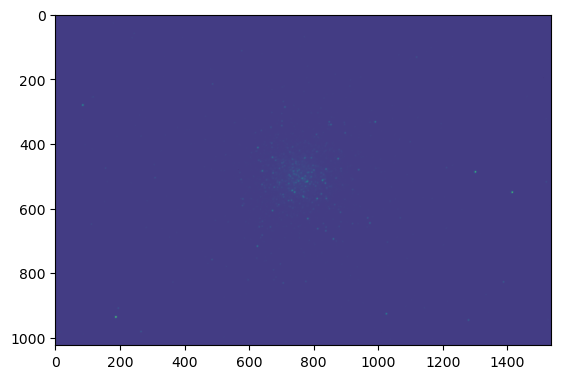

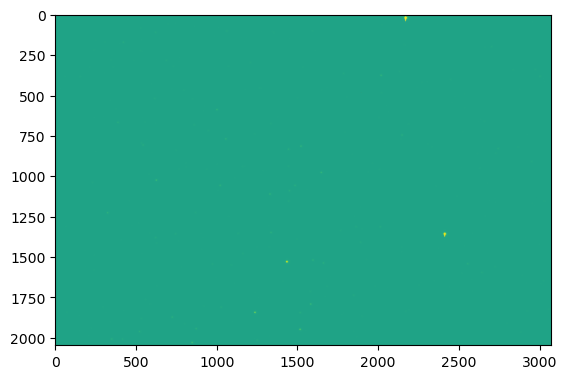

In [5]:
image = data[0].data
plt.imshow(image)
plt.show()
image2 = data2[0].data
plt.imshow(image2)
plt.show()

You can probably tell that the image is of a globular cluster, but obviously the choice of scale, etc. is not ideal. If you want to know what the colorscale and its min and max look like, add the line `plt.colorbar()`, as below. At the same time, let's increase the size of the image using `figsize` so that we can see it better.

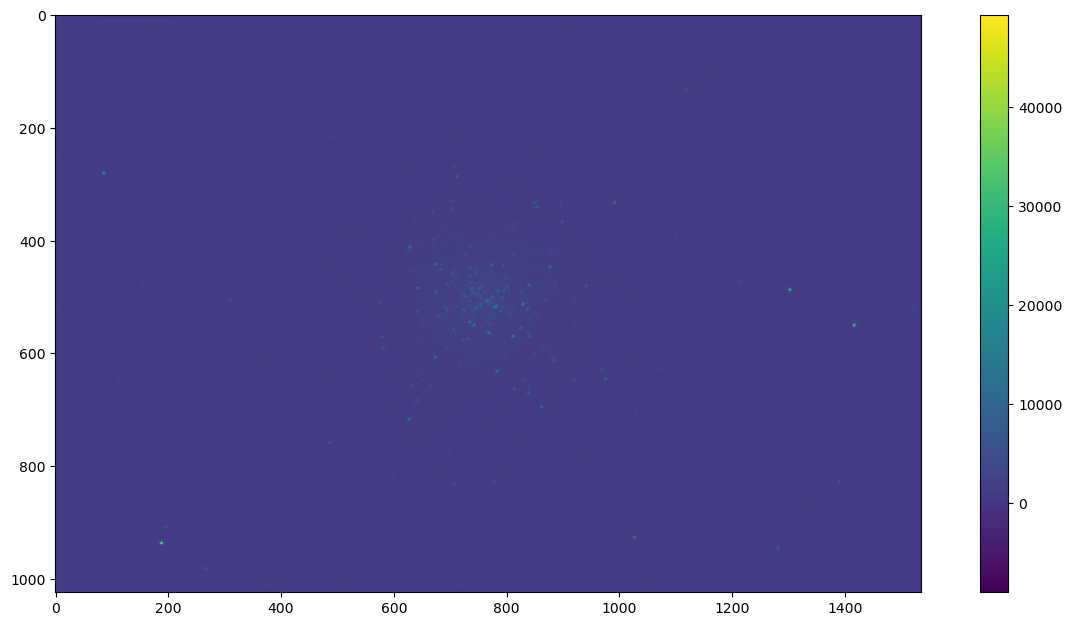

In [6]:
plt.figure(figsize=(15,7.5))
plt.imshow(image)
plt.colorbar()

## Exercise 1
Spend no more than 5 minutes playing with the imshow function's keywords `cmap` (for "color map", options below) and `vmin` and `vmax`, the minimum and maximum values for the colorbar. Stop when you think you can better see the stars in the image.

![](https://drive.google.com/uc?export=view&id=1Wazmr5g4Yjrp5ttt6uuzDkWJFnrySH2Z)

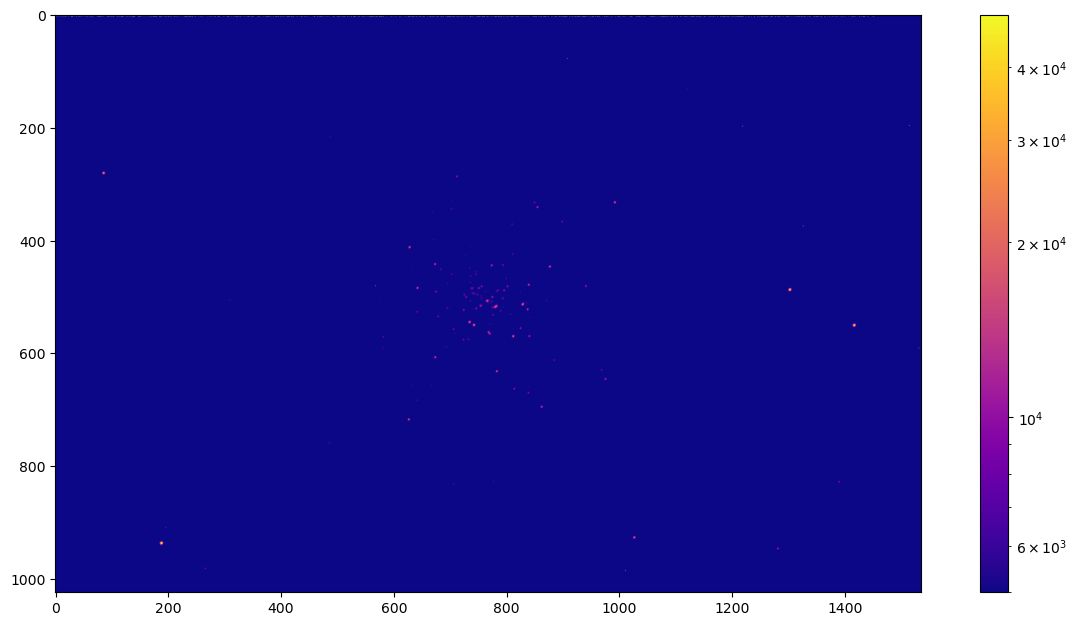

In [7]:
# Your plotting code goes here
plt.figure(figsize=(15,7.5))
plt.imshow(image, cmap='plasma', vmin=5000, norm="log")
plt.colorbar()

You can also zoom in on a region of the image by using the indices of the pixels you want. Note though, that the indices are in the form [ymin:ymax,xmin:xmax] AND that, if you look at the image above, python images display with the pixel 0,0 in the upper left corner rather than the lower left, as is more typical.

Since most astronomical images are oriented for a lower left pixel origin (so that, for example, North is up and East is left in the image), you should generally use the option origin="lower" when displaying. For example, to zoom in on the center of the cluster:

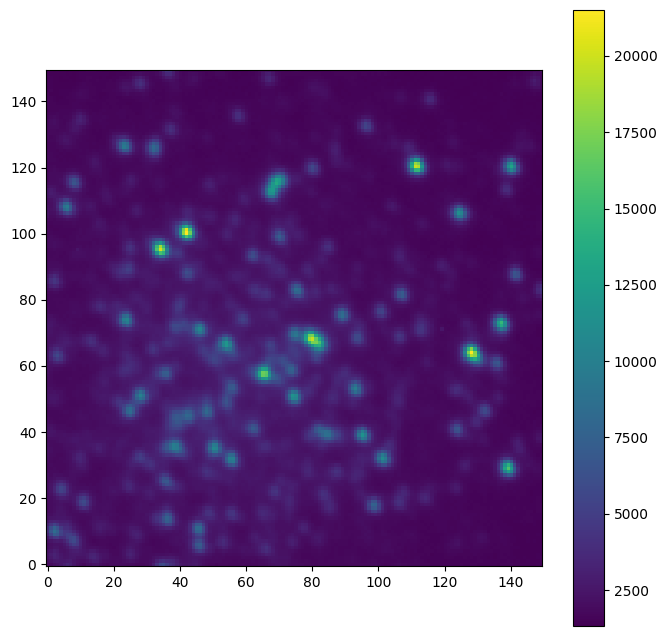

In [21]:
plt.figure(figsize=(8,8))
plt.imshow(image[450:600,700:850], origin="lower")
plt.colorbar()

# Exercise 2

Create a nicely scaled image of the globular cluster that shows most of its stars and not a lot of empty space.  Do the same for the other .fits file in the Lab04 directory, which contains an image of an open cluster. If you're feeling ambitious, put them side-by-side in the same plot. Make sure to label the images appropriately (perhaps with an image title)!

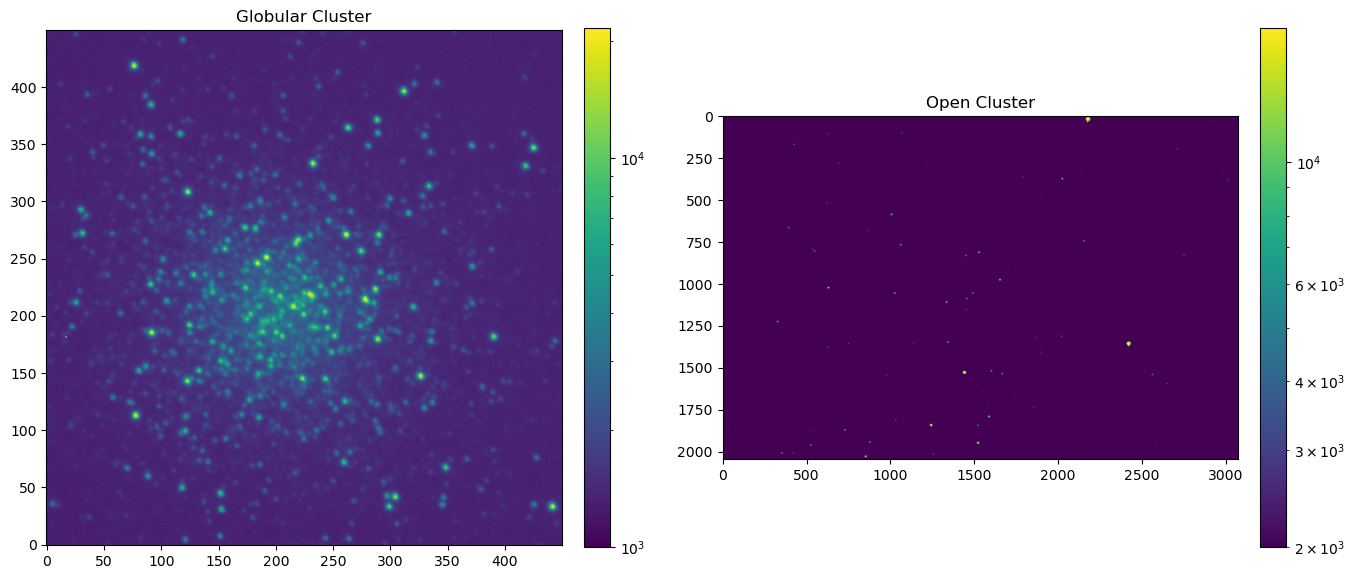

In [39]:
# Your code for image here

image = data[0].data
image2 = data2[0].data

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,8))

im = ax1.imshow(image[300:750,550:1000], origin="lower", vmin=1000, norm="log")
plt.colorbar(im, ax=ax1,fraction=0.046, pad=0.04)
ax1.set_title("Globular Cluster")

im2 = ax2.imshow(image2,vmin=2000,vmax=17500, norm="log")
plt.colorbar(im2, ax=ax2,fraction=0.046, pad=0.04)
ax2.set_title("Open Cluster")

plt.show()

## Submission Instructions

Before submitting any Jupyter notebook for grading, please follow the following steps

**1) Hit the "Restart the kernel run the whole notebook" button**

Make sure the entire notebook runs from start to finish. If necessary, comment out any un-executable cells from the instructions portion of the lab so the whole notebook will execute in one go.

**2) Make sure the names of all group members are in a markdown cell at the top of the file and submit the notebook through the Gradescope link for this Lab**